In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


# EDA

In [5]:
data.shape

(6650, 11)

In [33]:
len(data['ID'].unique())

6650

In [10]:
data.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [4]:
data['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [7]:
data['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [22]:
data['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [82]:
data['Credit_Card'].value_counts()

1    4418
0    2232
Name: Credit_Card, dtype: int64

In [83]:
data.groupby('Credit_Card')['Is_Churn'].describe()

,count,mean,std,min,25%,50%,75%,max
Credit_Card,,,,,,,,
0,2232.0,0.231631,0.421969,0.0,0.0,0.0,0.0,1.0
1,4418.0,0.230874,0.421439,0.0,0.0,0.0,0.0,1.0


In [8]:
data['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [9]:
data.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,6650,6650,334afe2d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,6650,NaN,NaN,NaN,41.1302,9.68575,21,34,40,47,72
Gender,6650,2,Male,3612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,6650,4,10L - 15L,1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,6650,NaN,NaN,NaN,804595,515755,63,392264,764939,1.14712e+06,2.43662e+06
Vintage,6650,NaN,NaN,NaN,2.25023,1.4588,0,1,2,3,5
Transaction_Status,6650,NaN,NaN,NaN,0.515789,0.499788,0,0,1,1,1
Product_Holdings,6650,3,1,3200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Card,6650,NaN,NaN,NaN,0.664361,0.472249,0,0,1,1,1
Credit_Category,6650,3,Poor,3076,NaN,NaN,NaN,NaN,NaN,NaN,NaN


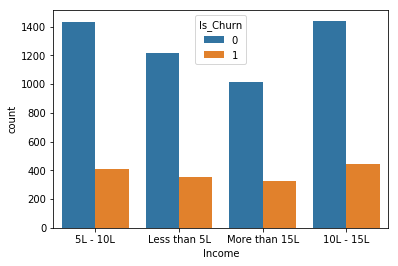

In [12]:
sns.countplot(x='Income', data=data,hue='Is_Churn')

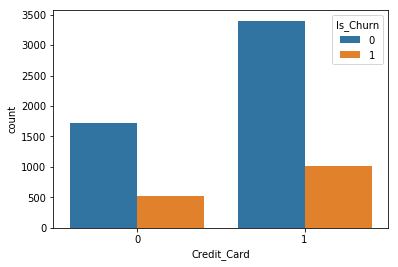

In [81]:
sns.countplot(x='Credit_Card', data=data,hue='Is_Churn')

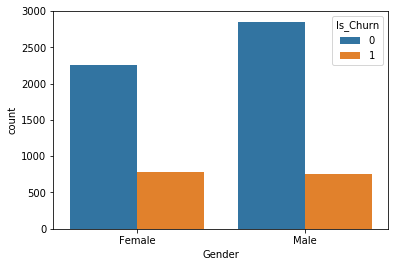

In [48]:
sns.countplot(x='Gender', data=data,hue='Is_Churn')

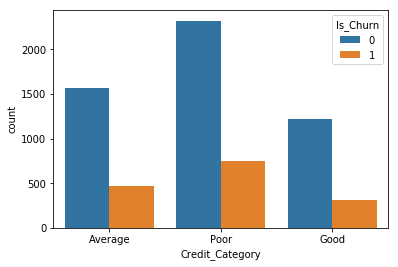

In [13]:
sns.countplot(x='Credit_Category', data=data,hue='Is_Churn')

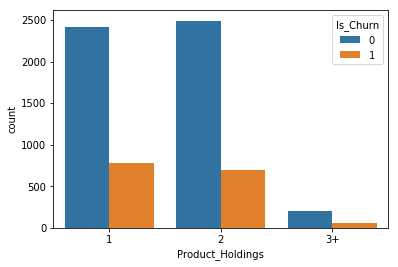

In [23]:
sns.countplot(x='Product_Holdings', data=data,hue='Is_Churn')

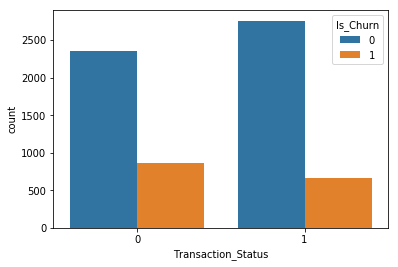

In [28]:
sns.countplot(x='Transaction_Status', data=data,hue='Is_Churn')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA06F7AC18>,
      dtype=object)

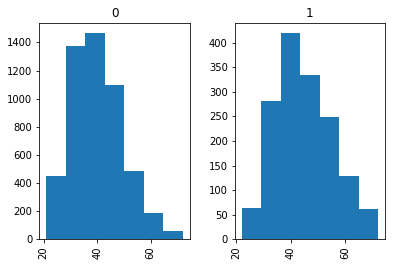

In [68]:
data.hist(column='Age',by='Is_Churn',bins=7)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA06FDE828>,
      dtype=object)

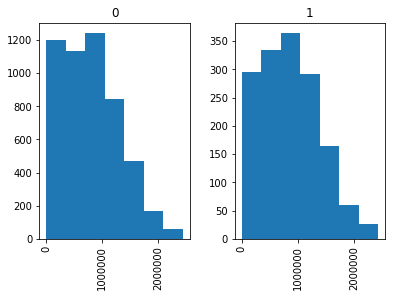

In [69]:
data.hist(column='Balance',by='Is_Churn',bins=7)

In [14]:
data.corr()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Age,1.000000,0.002154,0.017353,0.032166,0.012089,0.204301
Balance,0.002154,1.000000,-0.019385,-0.005088,-0.025259,0.056380
Vintage,0.017353,-0.019385,1.000000,-0.027286,0.001856,0.020152
Transaction_Status,0.032166,-0.005088,-0.027286,1.000000,0.006526,-0.086917
Credit_Card,0.012089,-0.025259,0.001856,0.006526,1.000000,-0.000848
Is_Churn,0.204301,0.056380,0.020152,-0.086917,-0.000848,1.000000


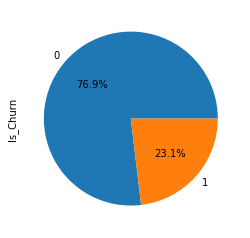

In [15]:
data['Is_Churn'].value_counts().plot.pie(autopct="%1.1f%%")

In [16]:
from scipy.stats import chi2_contingency
csq=chi2_contingency(pd.crosstab(data['Credit_Category'], data['Is_Churn']))
print("P-value: ",csq[1])

P-value:  0.005785995893842243


C:\Users\rashmi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rashmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rashmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


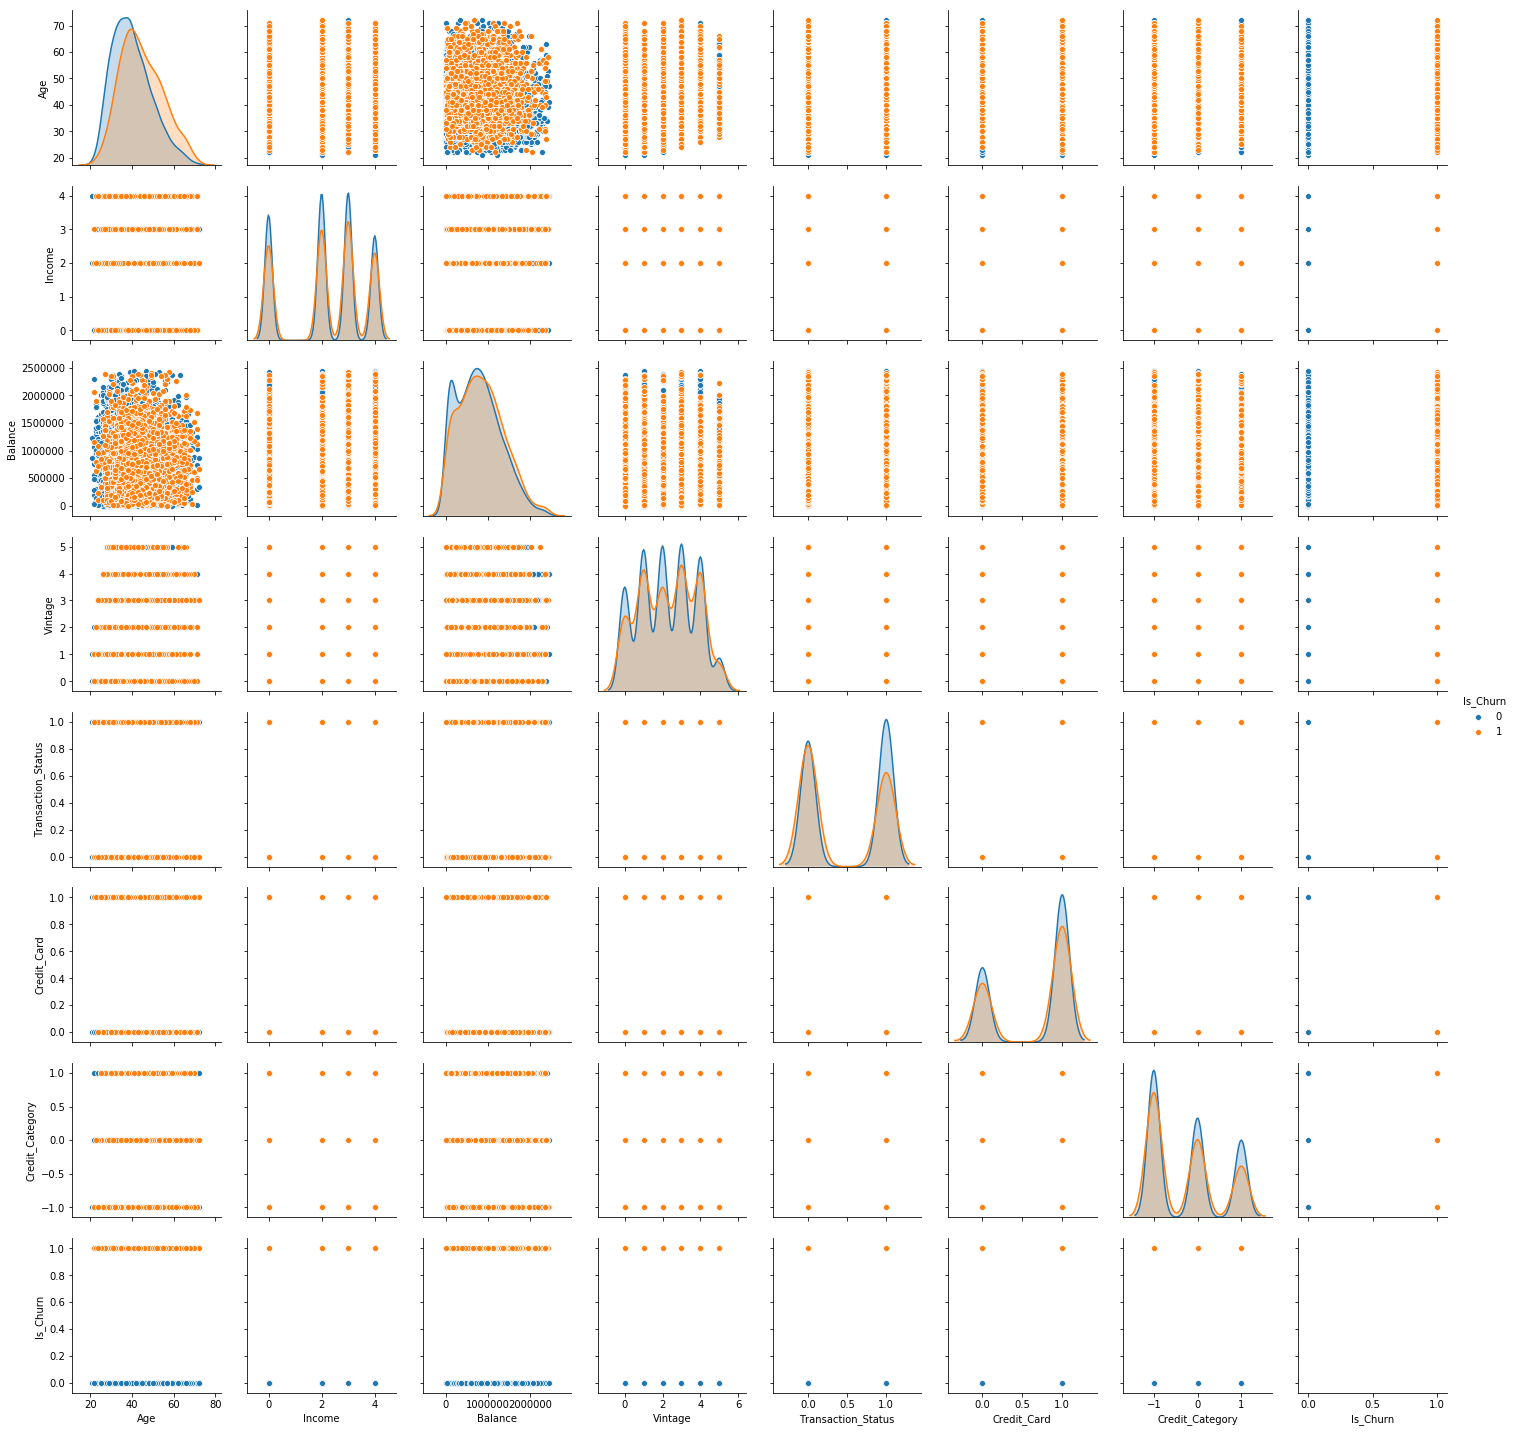

In [24]:
sns.pairplot(data,hue='Is_Churn')

# Data PreProcessing

In [3]:
#encoding categorical variable
data.replace({'Credit_Category': {'Poor': -1, 'Average': 0,'Good':1},'Income':{'Less than 5L':1,'5L - 10L':2,'10L - 15L':3,'More than 15L':4}},inplace=True)

In [4]:
data.replace({'Product_Holdings': {'1': 1, '2': 2,'3+':3}},inplace=True)

In [5]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,2,563266.44,4,0,1,0,0,1
1,57fea15e,53,Female,1,875572.11,2,1,1,1,-1,0
2,8df34ef3,35,Female,4,701607.06,2,1,2,0,-1,0
3,c5c0788b,43,Female,4,1393922.16,0,1,2,1,-1,1
4,951d69c4,39,Female,4,893146.23,1,1,1,1,1,1


In [6]:
data.replace({'Gender': {'Male': 0, 'Female': 1}},inplace=True)


In [7]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,1,2,563266.44,4,0,1,0,0,1
1,57fea15e,53,1,1,875572.11,2,1,1,1,-1,0
2,8df34ef3,35,1,4,701607.06,2,1,2,0,-1,0
3,c5c0788b,43,1,4,1393922.16,0,1,2,1,-1,1
4,951d69c4,39,1,4,893146.23,1,1,1,1,1,1


In [8]:
def preprocess(data):
    #encoding categorical variable
    data.replace({'Credit_Category': {'Poor': -1, 'Average': 0,'Good':1},'Income':{'Less than 5L':1,'5L - 10L':2,'10L - 15L':3,'More than 15L':4}},inplace=True)
    data.replace({'Product_Holdings': {'1': 1, '2': 2,'3+':3}},inplace=True)
    data.replace({'Gender': {'Male': 0, 'Female': 1}},inplace=True)
    #data.drop('ID',axis=1,inplace=True)
    return data
    

    

# Model building before Feature Engineering

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV

In [11]:
y=data['Is_Churn']
X=data.drop(['Is_Churn','ID'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

In [84]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 5000,criterion='gini')
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
rfc1.feature_importances_

array([0.26043556, 0.03306798, 0.08141061, 0.35055813, 0.11256587,
       0.02129288, 0.0451383 , 0.03688529, 0.05864538])

In [87]:
X_train.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category'],
      dtype='object')

In [12]:
pred=rfc1.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [43]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

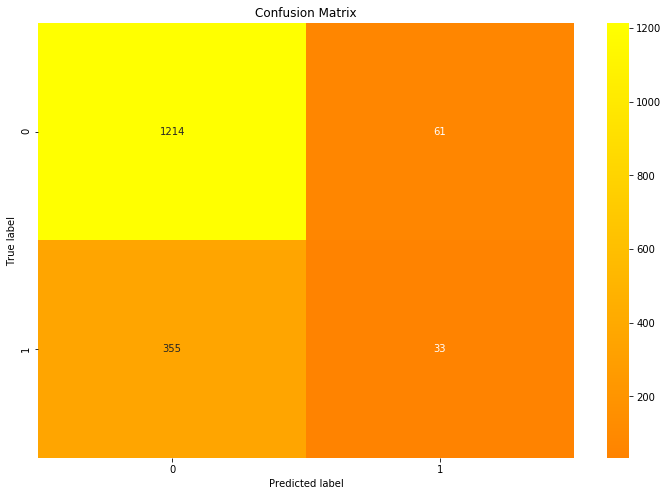

In [44]:
draw_confusion_matrix(confusion_matrix(y_test,pred))

In [45]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Accuracy for Random Forest on CV data:  0.7498496692723993
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1275
           1       0.35      0.09      0.14       388

    accuracy                           0.75      1663
   macro avg       0.56      0.52      0.50      1663
weighted avg       0.68      0.75      0.69      1663



In [15]:
print("recall",recall_score(y_test,pred,average='weighted'))
print("precision",precision_score(y_test,pred,average='weighted'))

recall 0.7576668671076368
precision 0.6932266228330233


In [85]:
print("recall",recall_score(y_test,pred))
print("precision",precision_score(y_test,pred))

recall 0.09020618556701031
precision 0.3645833333333333


In [72]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Accuracy for Random Forest on CV data:  0.751052315093205
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1275
           1       0.36      0.09      0.14       388

    accuracy                           0.75      1663
   macro avg       0.57      0.52      0.50      1663
weighted avg       0.68      0.75      0.69      1663



In [48]:
y_pred_prob=rfc1.predict_proba(X_test)
print("roc auc score",roc_auc_score(y_test,y_pred_prob[:,1]))

roc auc score 0.5638750758035174


In [73]:
y_pred_prob=rfc1.predict_proba(X_test)
print("roc auc score",roc_auc_score(y_test,y_pred_prob[:,1]))

roc auc score 0.5654224782696584


In [21]:
test=pd.read_csv('test.csv')
test_run=test.copy()
test_data=preprocess(test_run)
test_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,1,4,1008636.39,2,1,2,1,0
1,9aededf2,36,0,2,341460.72,2,0,2,1,0
2,a5034a09,25,1,3,439460.10,0,0,2,1,1
3,b3256702,41,0,1,28581.93,0,1,2,1,-1
4,dc28adb5,48,0,4,1104540.03,2,1,3,0,1


In [59]:
test.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,1,4,1008636.39,2,1,2,1,0
1,36,0,2,341460.72,2,0,2,1,0
2,25,1,3,439460.10,0,0,2,1,1
3,41,0,0,28581.93,0,1,2,1,-1
4,48,0,4,1104540.03,2,1,3,0,1


In [17]:
test_pred=rfc1.predict(test_data.drop('ID',axis=1))
test_pred_df=pd.DataFrame(test_pred,columns=['Is_Churn'])
df_out = pd.concat([test_pred_df, test['ID']], axis=1)

In [24]:
df_out.head()

,Is_Churn,ID
0,0,55480787
1,0,9aededf2
2,0,a5034a09
3,0,b3256702
4,0,dc28adb5


In [45]:
df_out.to_csv('submission.csv')

In [76]:
import lightgbm as lgb 
train_data=lgb.Dataset(X_train,label=y_train)
param_algo = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'is_unbalance' : True,
            }
num_round=50
lgbm2=lgb.train(param_algo,train_data,num_round)

In [77]:
pred = lgbm2.predict(X_test)
from sklearn.metrics import roc_auc_score
print(pred)
print("roc auc score",roc_auc_score(y_test,pred))

[0.24382179 0.25347351 0.09344498 ... 0.23287188 0.12529871 0.1654365 ]
roc auc score 0.6041146149181322


In [78]:
lgbm_pred=[]
for i in pred:
    if i <0.3:
        lgbm_pred.append(1)
    else:
        lgbm_pred.append(0)

In [81]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("recall",recall_score(y_test,lgbm_pred,average='weighted'))
print("precision",precision_score(y_test,lgbm_pred,average='weighted'))

recall 0.3205051112447384
precision 0.5724566013444248


In [72]:
[int(x) for x in np.linspace(start=10,stop=100,num=11)]

[10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100]

### Randomized Search CV

In [71]:
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=1000,stop=8000,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
print("best parameters",best_random)
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))
print(classification_report(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total=  44.6s
[CV] n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.5s remaining:    0.0s


[CV]  n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total=  43.7s
[CV] n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 
[CV]  n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total=  47.0s
[CV] n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total=  50.5s
[CV] n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total=  49.0s
[CV] n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total=  50.0s
[CV] n_estimators=2400, min_samples_s

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 25.7min finished


best parameters RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=37, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=5200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7534576067348165
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1261
           1       0.42      0.05      0.10       402

    accuracy                           0.75      1663
   macro avg       0.59      0.52      0.48      1663
weighted avg       0.68      0.75      0.67      1663



In [73]:
# best parameters RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=37, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=15,
#                        min_weight_fraction_leaf=0.0, n_estimators=5200,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

In [74]:
y_pred_prob=best_random.predict_proba(X_test)
print("roc auc score",roc_auc_score(y_test,y_pred_prob[:,1]))

roc auc score 0.6336122717104407


In [75]:
prediction_cv_trn=best_random.predict(X_train)
print(accuracy_score(y_train,prediction_cv_trn))
print(classification_report(y_train,prediction_cv_trn))

0.817926609183878
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3852
           1       0.97      0.21      0.34      1135

    accuracy                           0.82      4987
   macro avg       0.89      0.60      0.62      4987
weighted avg       0.85      0.82      0.77      4987



In [78]:
np.unique(prediction_cv,return_counts=True)

(array([0, 1], dtype=int64), array([1611,   52], dtype=int64))

In [79]:
prediction_cv_test=best_random.predict(test_data.drop('ID',axis=1))

In [80]:
np.unique(prediction_cv_test,return_counts=True)

(array([0, 1], dtype=int64), array([2785,   66], dtype=int64))

### GridSearch CV

In [ ]:
model_rfc=RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators':[5200],'max_depth':[20,40],'min_samples_leaf':[20,40,60,80]}
model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=5,verbose=1,n_jobs=-1,scoring='f1').fit(X_train4,y_train4)
print(model_rfc_grid.best_params_)

# Feature Engineering

In [14]:
data['networth_inbank']=data['Vintage']*data['Balance']
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,inc_bal_rat,start_age,age_bal_ratio,networth_inbank
0,84e2fcc9,36,1,2,563266.44,4,0,1,0,0,1,0.751022,32,15646.290000,2253065.76
1,57fea15e,53,1,1,875572.11,2,1,1,1,-1,0,3.502288,51,16520.228491,1751144.22
2,8df34ef3,35,1,4,701607.06,2,1,2,0,-1,0,0.400918,33,20045.916000,1403214.12
3,c5c0788b,43,1,4,1393922.16,0,1,2,1,-1,1,0.796527,43,32416.794419,0.00
4,951d69c4,39,1,4,893146.23,1,1,1,1,1,1,0.510369,38,22901.185385,893146.23


In [13]:
data['start_age']=data['Age']-data['Vintage']
data['age_bal_ratio']=data['Balance']/data['Age']
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,inc_bal_rat,start_age,age_bal_ratio
0,84e2fcc9,36,1,2,563266.44,4,0,1,0,0,1,0.751022,32,15646.290000
1,57fea15e,53,1,1,875572.11,2,1,1,1,-1,0,3.502288,51,16520.228491
2,8df34ef3,35,1,4,701607.06,2,1,2,0,-1,0,0.400918,33,20045.916000
3,c5c0788b,43,1,4,1393922.16,0,1,2,1,-1,1,0.796527,43,32416.794419
4,951d69c4,39,1,4,893146.23,1,1,1,1,1,1,0.510369,38,22901.185385


In [12]:
def inc_bal_ratio(inc,bal):
    if inc==1:
        return bal/250000.0
    if inc==2:
        return bal/750000.0
    if inc==3:
        return bal/1250000.0
    if inc==4:
        return bal/1750000.0
data['inc_bal_rat'] = data.apply(lambda x: inc_bal_ratio(x['Income'], x['Balance']), axis=1)
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,inc_bal_rat
0,84e2fcc9,36,1,2,563266.44,4,0,1,0,0,1,0.751022
1,57fea15e,53,1,1,875572.11,2,1,1,1,-1,0,3.502288
2,8df34ef3,35,1,4,701607.06,2,1,2,0,-1,0,0.400918
3,c5c0788b,43,1,4,1393922.16,0,1,2,1,-1,1,0.796527
4,951d69c4,39,1,4,893146.23,1,1,1,1,1,1,0.510369


In [137]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,inc_bal_rat,networth_inbank,start_age,age_bal_ratio
0,84e2fcc9,36,1,2,563266.44,4,0,1,0,0,1,0.751022,2253065.76,32,15646.290000
1,57fea15e,53,1,1,875572.11,2,1,1,1,-1,0,3.502288,1751144.22,51,16520.228491
2,8df34ef3,35,1,4,701607.06,2,1,2,0,-1,0,0.400918,1403214.12,33,20045.916000
3,c5c0788b,43,1,4,1393922.16,0,1,2,1,-1,1,0.796527,0.00,43,32416.794419
4,951d69c4,39,1,4,893146.23,1,1,1,1,1,1,0.510369,893146.23,38,22901.185385


In [15]:
data['tran_cred']=data['Transaction_Status']+data['Credit_Card']

In [16]:
data['bal_6m']=data['Balance']*2
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,inc_bal_rat,start_age,age_bal_ratio,networth_inbank,tran_cred,bal_6m
0,84e2fcc9,36,1,2,563266.44,4,0,1,0,0,1,0.751022,32,15646.290000,2253065.76,0,1126532.88
1,57fea15e,53,1,1,875572.11,2,1,1,1,-1,0,3.502288,51,16520.228491,1751144.22,2,1751144.22
2,8df34ef3,35,1,4,701607.06,2,1,2,0,-1,0,0.400918,33,20045.916000,1403214.12,1,1403214.12
3,c5c0788b,43,1,4,1393922.16,0,1,2,1,-1,1,0.796527,43,32416.794419,0.00,2,2787844.32
4,951d69c4,39,1,4,893146.23,1,1,1,1,1,1,0.510369,38,22901.185385,893146.23,2,1786292.46


# Modelling approaches after Feature Engineering

In [17]:
y2=data['Is_Churn']
X2=data.drop(['Is_Churn','ID'],axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=.25)

In [159]:
rfc_new=RandomForestClassifier( n_estimators= 5000,max_depth=40,n_jobs=-1)
rfc_new.fit(X_train2, y_train2)
prediction_new=rfc_new.predict(X_test2)
pred_thrs=[]
pred_test=rfc_new.predict_proba(X_test2)
for i in pred_test:
    if i[0]<0.65:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print(accuracy_score(y_test2,pred_thrs))
print(classification_report(y_test2,pred_thrs))
print("----------------------------------------------------------")
pred_thrs=[]
for i in pred_test:
    if i[1]<0.25:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print(accuracy_score(y_test2,pred_thrs))
print(classification_report(y_test2,pred_thrs))
y_pred_prob_new=rfc_new.predict_proba(X_test2)
print("roc auc score",roc_auc_score(y_test2,y_pred_prob_new[:,1]))

0.6891160553217077
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1293
           1       0.30      0.29      0.29       370

    accuracy                           0.69      1663
   macro avg       0.55      0.55      0.55      1663
weighted avg       0.69      0.69      0.69      1663

----------------------------------------------------------
0.41551413108839447
              precision    recall  f1-score   support

           0       0.72      0.40      0.52      1293
           1       0.18      0.47      0.26       370

    accuracy                           0.42      1663
   macro avg       0.45      0.43      0.39      1663
weighted avg       0.60      0.42      0.46      1663

roc auc score 0.5978428544553835


In [168]:
pred_thrs=[]
for i in pred_test:
    if i[1]<0.6:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print(accuracy_score(y_test2,pred_thrs))
print(classification_report(y_test2,pred_thrs))

0.22669873722188816
              precision    recall  f1-score   support

           0       0.61      0.01      0.03      1293
           1       0.22      0.97      0.36       370

    accuracy                           0.23      1663
   macro avg       0.42      0.49      0.19      1663
weighted avg       0.53      0.23      0.10      1663



In [169]:
rfc_new.feature_importances_

array([0.10226691, 0.01956822, 0.03460139, 0.11655357, 0.0426754 ,
       0.01456395, 0.0271902 , 0.01438198, 0.03282824, 0.12305571,
       0.11257281, 0.10047255, 0.12255975, 0.02041524, 0.11629409])

In [150]:
X_train2.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'inc_bal_rat',
       'networth_inbank', 'start_age', 'age_bal_ratio', 'tran_cred', 'bal_6m'],
      dtype='object')

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=5000)
clf.fit(X_train2, y_train2)
prediction_new=clf.predict(X_test2)
print(accuracy_score(y_test2,prediction_new))
print(classification_report(y_test2,prediction_new))
y_pred_prob_new=clf.predict_proba(X_test2)
print("roc auc score",roc_auc_score(y_test2,y_pred_prob_new[:,1]))

0.7215874924834637
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1294
           1       0.30      0.18      0.23       369

    accuracy                           0.72      1663
   macro avg       0.54      0.53      0.53      1663
weighted avg       0.68      0.72      0.70      1663

roc auc score 0.5716188537464972


In [131]:
rfc_new_ful=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 5000,criterion='gini')
rfc_new_ful.fit(X2, y2)
prediction_new=rfc_new_ful.predict(X2)


In [132]:
print(accuracy_score(y2,prediction_new))
print(classification_report(y2,prediction_new))
y_pred_prob_new=rfc_new_ful.predict_proba(X2)
print("roc auc score",roc_auc_score(y2,y_pred_prob_new[:,1]))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5113
           1       1.00      1.00      1.00      1537

    accuracy                           1.00      6650
   macro avg       1.00      1.00      1.00      6650
weighted avg       1.00      1.00      1.00      6650

roc auc score 1.0


In [19]:
def preprocess2(test_data):
    test_data['inc_bal_rat'] = test_data.apply(lambda x: inc_bal_ratio(x['Income'], x['Balance']), axis=1)
    test_data['networth_inbank']=test_data['Vintage']*data['Balance']
    test_data['start_age']=test_data['Age']-data['Vintage']
    test_data['age_bal_ratio']=test_data['Balance']/data['Age']
    print(test_data.head(2))
    return test_data
    

In [23]:
test_data=preprocess2(test_data)
# test_pred=rfc_new_ful.predict(test_data.drop('ID',axis=1))
# test_pred_df=pd.DataFrame(test_pred,columns=['Is_Churn'])
# df_out = pd.concat([test_pred_df, test['ID']], axis=1)
# df_out.set_index('ID',inplace=True)
# df_out['Is_Churn'].value_counts()


         ID  Age  Gender  Income     Balance  Vintage  Transaction_Status  \
0  55480787   50       1       4  1008636.39        2                   1   
1  9aededf2   36       0       2   341460.72        2                   0   

   Product_Holdings  Credit_Card  Credit_Category  inc_bal_rat  \
0                 2            1                0     0.576364   
1                 2            1                0     0.455281   

   networth_inbank  start_age  age_bal_ratio  
0       1126532.88       46.0   28017.677500  
1       1751144.22       34.0    6442.655094  


In [135]:
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=1000,stop=8000,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42,scoring='f1')
random_cv.fit(X2,y2)
best_random=random_cv.best_estimator_
print("best parameters",best_random)
prediction_cv=best_random.predict(X2)
print(accuracy_score(y2,prediction_cv))
print(classification_report(y2,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total= 2.9min
[CV] n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV]  n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total= 2.7min
[CV] n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91 
[CV]  n_estimators=5200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=91, total= 2.6min
[CV] n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total= 4.9min
[CV] n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total= 4.6min
[CV] n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91 
[CV]  n_estimators=7300, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=91, total= 4.1min
[CV] n_estimators=2400, min_samples_s

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 95.6min finished


best parameters RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=91, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5113
           1       1.00      1.00      1.00      1537

    accuracy                           1.00      6650
   macro avg       1.00      1.00      1.00      6650
weighted avg       1.00      1.00      1.00      6650



In [136]:
test_pred=best_random.predict(test_data.drop('ID',axis=1))
test_pred_df=pd.DataFrame(test_pred,columns=['Is_Churn'])
df_out = pd.concat([test_pred_df, test['ID']], axis=1)
df_out.set_index('ID',inplace=True)
df_out['Is_Churn'].value_counts()

0    2765
1      86
Name: Is_Churn, dtype: int64

In [177]:
test_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,inc_bal_rat,networth_inbank,start_age,age_bal_ratio
0,55480787,50,1,4,1008636.39,2,1,2,1,0,0.576364,1126532.88,46.0,28017.677500
1,9aededf2,36,0,2,341460.72,2,0,2,1,0,0.455281,1751144.22,34.0,6442.655094
2,a5034a09,25,1,3,439460.10,0,0,2,1,1,0.351568,0.00,23.0,12556.002857
3,b3256702,41,0,1,28581.93,0,1,2,1,-1,0.114328,0.00,41.0,664.696047
4,dc28adb5,48,0,4,1104540.03,2,1,3,0,1,0.631166,1786292.46,47.0,28321.539231


In [26]:
test_data['tran_cred']=test_data['Transaction_Status']+test_data['Credit_Card']
test_data['bal_6m']=test_data['Balance']*2

In [27]:
from xgboost import XGBClassifier
xgb_model2 = XGBClassifier(params={'max_depth': 40, 'n_estimators': 5200})
xgb_model2.fit(X_train2, y_train2)
prediction_xgb = xgb_model2.predict(X_test2)
print(accuracy_score(y_test2, prediction_xgb))
print(prediction_xgb)
pred=xgb_model2.predict(X_test2)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test2,pred))
print(classification_report(y_test2,pred))
y_pred_prob=xgb_model2.predict_proba(X_test2)
print("roc auc score",roc_auc_score(y_test2,y_pred_prob[:,1]))
test_pred=xgb_model2.predict(test_data.drop('ID',axis=1))
test_pred_df=pd.DataFrame(test_pred,columns=['Is_Churn'])
df_out = pd.concat([test_pred_df, test['ID']], axis=1)
df_out.set_index('ID',inplace=True)
print(df_out['Is_Churn'].value_counts())
df_out.to_csv('xgb_new.csv')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:24:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7492483463619964
[0 0 0 ... 1 0 1]
Accuracy for Random Forest on CV data:  0.7492483463619964
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1301
           1       0.32      0.14      0.20       362

    accuracy                           0.75      1663
   macro avg       0.56      0.53      0.52      1663
weighted avg       0.69

# PCA DataCreation

In [225]:
from sklearn.preprocessing import StandardScaler
X_train3 = StandardScaler().fit_transform(data.drop('ID',axis=1))
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca_1', 'pca_2','pca_3','pca_4','pca_5'])
finalDf = pd.concat([principalDf, data[['Is_Churn']]], axis = 1)


In [226]:
principalDf.shape

(6650, 5)

In [204]:
finalDf.shape

(6650, 9)

In [174]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [227]:
finalDf.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,Is_Churn
0,-0.118821,-1.002943,2.497351,-0.878575,-0.810139,1
1,0.353358,2.164524,-1.179778,1.516835,-1.097364,0
2,-0.584360,-1.167004,0.063375,-0.817145,1.170898,0
3,0.559628,1.324527,-1.413376,0.123175,2.563386,1
4,-0.173185,0.648027,-1.550357,-0.543839,1.835817,1


In [172]:
y3=data['Is_Churn']
X3=data.drop(['Is_Churn','ID'],axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=.25)

In [223]:
X_train3.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'inc_bal_rat',
       'networth_inbank', 'start_age', 'age_bal_ratio', 'tran_cred', 'bal_6m'],
      dtype='object')

In [173]:
rfc_pca=RandomForestClassifier( n_estimators= 5000,max_depth=40,n_jobs=-1)
rfc_pca.fit(X_train3, y_train3)
prediction_new=rfc_pca.predict(X_test3)
print(classification_report(y_test3,prediction_new))
print("--------------------------")
pred_thrs=[]
pred_test=rfc_pca.predict_proba(X_test3)
for i in pred_test:
    if i[0]<0.65:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print("accuracy score",accuracy_score(y_test3,pred_thrs))
print(classification_report(y_test3,pred_thrs))
y_pred_prob_new=rfc_pca.predict_proba(X_test3)
print("roc auc score",roc_auc_score(y_test3,y_pred_prob_new[:,1]))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1282
           1       0.32      0.06      0.10       381

    accuracy                           0.76      1663
   macro avg       0.55      0.51      0.48      1663
weighted avg       0.67      0.76      0.68      1663

--------------------------
accuracy score 0.7233914612146722
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1282
           1       0.38      0.32      0.35       381

    accuracy                           0.72      1663
   macro avg       0.59      0.58      0.59      1663
weighted avg       0.71      0.72      0.72      1663

roc auc score 0.6262504043468825


In [183]:
X_train3.head(2)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,inc_bal_rat,networth_inbank,start_age,age_bal_ratio,tran_cred,bal_6m
1686,64,0,1,740499.75,4,0,1,0,-1,2.961999,2961999.00,60,11570.308594,0,1480999.50
1563,44,0,3,1129243.68,3,1,2,0,-1,0.903395,3387731.04,41,25664.629091,1,2258487.36


In [228]:
principalComponents_test = pca.fit_transform(test_data.drop('ID',axis=1))
principalDf_test = pd.DataFrame(data = principalComponents_test
             , columns = ['pca_1', 'pca_2','pca_3','pca_4','pca_5'])

In [229]:
principalDf_test.head(2)

,pca_1,pca_2,pca_3,pca_4,pca_5
0,-701320.354361,4.291450e+05,2181.226075,11.228922,-1.753373
1,-44090.666725,-1.048776e+06,-2272.520779,-6.916778,0.212246


In [207]:
principalDf_test.shape

(2851, 8)

In [185]:
y_pred_prob_test=rfc_pca.predict_proba(test_data.drop('ID',axis=1))
pred_thrs=[]
for i in y_pred_prob_test:
    if i[0]<0.65:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)

In [186]:
np.unique(pred_thrs,return_counts=True)

(array([0, 1]), array([2135,  716], dtype=int64))

In [191]:
test_pred_df=pd.DataFrame(pred_thrs,columns=['Is_Churn'])

In [192]:
df_out = pd.concat([test_pred_df, test['ID']], axis=1)
print(df_out.head(2))

   Is_Churn        ID
0         1  55480787
1         0  9aededf2


In [193]:
df_out.set_index('ID',inplace=True)
df_out.dtypes

Is_Churn    int64
dtype: object

In [194]:
df_out.to_csv('sub_f159_bal6m.csv')

In [195]:
finalDf.head(2)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,Is_Churn
0,-0.118821,-1.002943,2.497351,-0.878575,-0.810139,0.917463,0.900202,0.287224,1
1,0.353358,2.164524,-1.179778,1.516835,-1.097364,0.471080,0.015201,1.074874,0


In [230]:
y4=finalDf['Is_Churn']
X4=finalDf.drop(['Is_Churn'],axis=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=.25)

# Running model on PCA Data

In [231]:
rfc_pca2=RandomForestClassifier( n_estimators= 5000,max_depth=40,n_jobs=-1)
rfc_pca2.fit(X_train4, y_train4)
prediction_new=rfc_pca2.predict(X_test4)
print(classification_report(y_test4,prediction_new))
print("--------------------------")
pred_thrs=[]
pred_test=rfc_pca2.predict_proba(X_test4)
for i in pred_test:
    if i[0]<0.65:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print("accuracy score",accuracy_score(y_test4,pred_thrs))
print(classification_report(y_test4,pred_thrs))
y_pred_prob_new=rfc_pca2.predict_proba(X_test4)
print("roc auc score",roc_auc_score(y_test4,y_pred_prob_new[:,1]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1254
           1       0.94      0.81      0.87       409

    accuracy                           0.94      1663
   macro avg       0.94      0.90      0.92      1663
weighted avg       0.94      0.94      0.94      1663

--------------------------
accuracy score 0.9476849067949489
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1254
           1       0.87      0.93      0.90       409

    accuracy                           0.95      1663
   macro avg       0.92      0.94      0.93      1663
weighted avg       0.95      0.95      0.95      1663

roc auc score 0.9785975830886396


# Grid Search using PCA Data

In [238]:
rf_c=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=5000,stop=6000,num=2)],
            'max_features':['auto'],
            'max_depth':[int(x) for x in np.linspace(start=30,stop=50,num=4)]}
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42,scoring='f1')
random_cv.fit(X_train4,y_train4)
best_random=random_cv.best_estimator_
print("best parameters",best_random)
prediction_cv=best_random.predict(X_test4)
print(accuracy_score(y_test4,prediction_cv))
print(classification_report(y_test4,prediction_cv))

C:\Users\rashmi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_estimators=5000, max_features=auto, max_depth=30 ..............
[CV]  n_estimators=5000, max_features=auto, max_depth=30, total= 1.8min
[CV] n_estimators=5000, max_features=auto, max_depth=30 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=5000, max_features=auto, max_depth=30, total= 2.2min
[CV] n_estimators=5000, max_features=auto, max_depth=30 ..............
[CV]  n_estimators=5000, max_features=auto, max_depth=30, total= 1.8min
[CV] n_estimators=6000, max_features=auto, max_depth=30 ..............
[CV]  n_estimators=6000, max_features=auto, max_depth=30, total= 2.0min
[CV] n_estimators=6000, max_features=auto, max_depth=30 ..............
[CV]  n_estimators=6000, max_features=auto, max_depth=30, total= 2.1min
[CV] n_estimators=6000, max_features=auto, max_depth=30 ..............
[CV]  n_estimators=6000, max_features=auto, max_depth=30, total= 2.3min
[CV] n_estimators=5000, max_features=auto, max_depth=36 ..............
[CV]  n_estimators=5000, max_features=auto, max_depth=36, total= 1.7min
[CV] n_estimators=5000, max_features=auto, max_depth=36 ..............
[CV]  n_estimators=5000, max_features=auto, max_depth=36, total= 1.7min
[CV] n_estimators=5000, max_features=auto, max_depth=36 ..............

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 45.5min finished


best parameters RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9404690318701142
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1254
           1       0.94      0.81      0.87       409

    accuracy                           0.94      1663
   macro avg       0.94      0.90      0.92      1663
weighted avg       0.94      0.94      0.94      1663



In [232]:
y_pred_prob_test=rfc_pca2.predict_proba(principalDf_test)
pred_thrs=[]
for i in y_pred_prob_test:
    if i[0]<0.65:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)

In [233]:
print(np.unique(pred_thrs,return_counts=True))
test_pred_df=pd.DataFrame(pred_thrs,columns=['Is_Churn'])
df_out = pd.concat([test_pred_df, test['ID']], axis=1)
print(df_out.head(2))
df_out.set_index('ID',inplace=True)
df_out.dtypes
df_out.to_csv('sub_f190_pca_thrs.csv')

(array([0, 1]), array([1380, 1471], dtype=int64))
   Is_Churn        ID
0         1  55480787
1         0  9aededf2


In [234]:

pred_thrs=rfc_pca2.predict(principalDf_test)
test_pred_df=pd.DataFrame(pred_thrs,columns=['Is_Churn'])
df_out = pd.concat([test_pred_df, test['ID']], axis=1)
print(df_out.head(2))
print(df_out['Is_Churn'].value_counts())
df_out.set_index('ID',inplace=True)
df_out.dtypes
df_out.to_csv('sub_f190_pca.csv')

   Is_Churn        ID
0         1  55480787
1         0  9aededf2
0    1483
1    1368
Name: Is_Churn, dtype: int64


In [235]:
print(np.unique(y_train4,return_counts=True))
y_pred_prob_test=rfc_pca2.predict_proba(X_train4)
pred_thrs=[]
for i in y_pred_prob_test:
    if i[0]<0.5:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print(np.unique(pred_thrs,return_counts=True))

(array([0, 1], dtype=int64), array([3859, 1128], dtype=int64))
(array([0, 1]), array([3859, 1128], dtype=int64))


In [236]:
pred_thrs=[]
for i in y_pred_prob_test:
    if i[0]<0.5:
        pred_thrs.append(1)
    else:
        pred_thrs.append(0)
print(np.unique(pred_thrs,return_counts=True))

(array([0, 1]), array([3859, 1128], dtype=int64))
